In [1]:
import os
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

import torch
import torch.nn as nn

from Data.MVTEC_data import MVTecDataloader
from Models.GANomaly.GANomaly_mvtec import GANomaly
from Utils.Visualizer import plot_distribution

In [2]:
args = OmegaConf.load('../Config/mvtec_GANomaly_config.yaml')
os.makedirs(args.experiment_path, exist_ok=True)
os.makedirs(args.checkpoint_save, exist_ok=True)
np.random.seed(42)
torch.manual_seed(42)
args

{'experiment_name': 'hazelnut', 'dataroot': './Datasets/mvtec/carpet', 'experiment_path': './Experiments/GANomaly/mvtec/carpet', 'checkpoint_save': './Experiments/GANomaly/mvtec/carpet/checkpoint', 'checkpoint_load': './Experiments/GANomaly/mvtec/carpet/checkpoint/checkpoint_best.pt', 'log_path': './Experiments/GANomaly/mvtec/carpet/carpet.log', 'start_epoch': 1, 'finish_epoch': 200, 'manualseed': 42, 'batchSize': 64, 'imageSize_h': 64, 'imageSize_w': 64, 'nc': 3, 'nz': 80, 'ngf': 64, 'n_extra_layers': 0, 'device': 'gpu', 'gpu_ids': 0, 'ngpu': 1, 'lr': 0.0002, 'b1': 0.5, 'b2': 0.999, 'w_adv': 1, 'w_con': 40, 'w_lat': 1, 'reset_disc_value': 1e-05, 'sample_interval': 50}

In [3]:
train_loader, val_loader = MVTecDataloader(args.dataroot, batchSize=args.batchSize, imageSize_h=args.imageSize_h, imageSize_w=args.imageSize_w, is_train=True)
test_neg_loader, test_pos_loader = MVTecDataloader(args.dataroot, batchSize=args.batchSize, imageSize_h=args.imageSize_h, imageSize_w=args.imageSize_w, is_train=False)

In [4]:
Tester = GANomaly(args)

{'gen_epoch_loss': 3.6377599094853257, 'disc_epoch_loss': 0.0007982595610277107, 'adv_loss': 0.4648126183134137, 'con_loss': 2.9439272808306143, 'lat_loss': 0.22901992906223645}
Checpoint have been loaded.


In [5]:
roc_auc, list_scores, list_labels, list_inputs, list_outputs = Tester.test(test_neg_loader, test_pos_loader)

In [6]:
roc_auc

0.8312447786131996

In [14]:
list_labels[21]

1.0

In [17]:
a = range(0, len(list_scores))

In [22]:
list_scores.argmax()

22

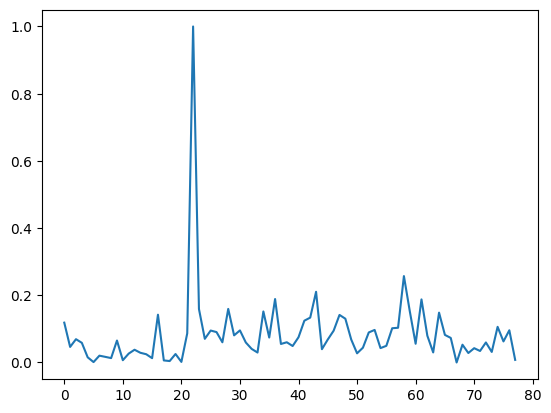

In [20]:
plt.plot(a, list_scores)